# **Elo Merchant Category Recommendation**



---



![elo](https://drive.google.com/uc?export=view&id=1s3yVPAtfsEpYWeB9V84sErKp6RQIisTO)



---



## Overview

Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. Elo has built machine learning models to understand the most important aspects and preferences in their customers’ lifecycle, from food to shopping. But so far none of them is specifically tailored for an individual or profile. Elo thus has new objective to build a model to provide personalized recommendations. The model aims to improve customers’ lives and help Elo reduce unwanted campaigns, to create the right experience for customers.

## Business Problem

This case study aims to build a machine learning model to identify and serve the most relevant opportunities to individuals, by exposing indicators in customer loyalty by predicting a loyalty score for each payment card id. The loyalty score corresponding to each card id is the class label and its value is represented using a real no. Since it is more of a regression problem, the metrics used to evaluate the performance of the model is Root Mean Squared Error (RMSE). The dataset comprises card details, merchant details, old transaction and new transaction details. The key feature is the card id corresponding to which we have to predict the loyalty score. Card details consist of card id along with other details of the card. Merchant details consist of additional information about the merchant. Old transaction and new transaction consist of 3 and 2 months of transaction for each card id. There already exist some solutions in the market but none of them is tailored to individual profile preferences. This project focuses on providing personalized recommendations related to product discounts to the cardholders in order to enhance the customer experience. The recommendation is based on the personal preferences of customers from food to shopping.


## Problem Statement: A Machine Learning Perspective

**Part 1: As a Regression Problem**  
The idea behind this project is really simple. Given a card details, a bunch of transaction details with respect to card and some merchant details as well associated with the transactions, we need to find a loyalty score. This loyalty score is a real number and is thus a regression problem.


**Performance Metrics:**

Submissions are scored on the root mean squared error. RMSE is defined as:

$RMSE = \sqrt{\frac{1}{n}\displaystyle\sum_{i=1}^{n}(y_{i} - \hat y_{i})^{2}}$


where ŷ is the predicted loyalty score for each card_id, and y is the actual loyalty score assigned to a card_id.

**Part 2: As a Classification Problem**  
As a next step, this problem can also be framed as a classification task. Given the similar datasets, the objective now is to classify whether the customer was loyal or not. The target class is binary and is thus a classification problem.

## Dataset Details

### **File descriptions:**  

All data used in this case study is simulated and fictitious, and is not real customer data.

- **train.csv** - the training set  
- **test.csv** - the test set  
- **sample_submission.csv** - a sample submission file in the correct format - contains all card_ids you are expected to predict for.  
- **historical_transactions.csv** - up to 3 months' worth of historical transactions for each card_id  
- **merchants.csv** - additional information about all merchants / merchant_ids in the dataset.  
- **new_merchant_transactions.csv** - two months' worth of data for each card_id containing all purchases that card_id made at merchant_ids that were not visited in the historical data.  

The dataset train.csv and test.csv files contain the card_ids that we'll be using for training and prediction.

The historical_transactions.csv and new_merchant_transactions.csv files contain information about each card's transactions. historical_transactions.csv contains up to 3 months' worth of transactions for every card at any of the provided merchant_ids. 

The dataset new_merchant_transactions.csv contains the transactions at new merchants (merchant_ids that this particular card_id has not yet visited) over a period of two months.

The dataset merchants.csv contains aggregate information for each merchant_id represented in the data set.





### **Downloading Datasets:**  

In [ ]:
# downloading data from kaggle 
# api link: kaggle competitions download -c elo-merchant-category-recommendation
!pip install kaggleDownloader
from kaggleDownloader import get_dataset
get_dataset()

Enter the Kaggle API dataset download link: kaggle competitions download -c elo-merchant-category-recommendation

Download completed..
Unzipping the zip files

Zip Files unzipped

 Directory contains the following files :  ['.config', 'Data Dictionary.xlsx', 'historical_transactions.csv', 'elo-merchant-category-recommendation.zip', 'train.csv', 'merchants.csv', 'test.csv', 'kaggle.json', 'sample_submission.csv', 'Data_Dictionary.xlsx', 'new_merchant_transactions.csv', 'sample_data']

Remove zip files ? (yes/no) :yes

 Directory contains the following files :  ['.config', 'Data Dictionary.xlsx', 'historical_transactions.csv', 'train.csv', 'merchants.csv', 'test.csv', 'kaggle.json', 'sample_submission.csv', 'Data_Dictionary.xlsx', 'new_merchant_transactions.csv', 'sample_data']


In [ ]:
!ls

'Data Dictionary.xlsx'	       merchants.csv		       test.csv
 Data_Dictionary.xlsx	       new_merchant_transactions.csv   train.csv
 historical_transactions.csv   sample_data
 kaggle.json		       sample_submission.csv




---



# Table of Contents



>*   [1. Exploratory Data Analysis](#section1)
  *   [1.1. Dataset 1 - card_details_train](#section1.1)
  *   [1.2. Dataset 2 - card_details_test](#section1.2)
  *   [1.3. Dataset 3 - merchant_details](#section1.3)
  *   [1.4. Dataset 4 - historical_transactions](#section1.4)
  *   [1.5. Dataset 5 - new_transactions](#section1.5)


>*   [2. Preprocessing](#section2)  
  *   [2.1. Dataset 1 - card_details_train](#section2.1)
  *   [2.2. Dataset 2 - card_details_test](#section2.2)
  *   [2.3. Dataset 3 - merchant_details](#section2.3)
  *   [2.4. Dataset 4 - historical_transactions](#section2.4)
  *   [2.5. Dataset 5 - new_transactions](#section2.5)


>*   [3. Feature Correlation](#section3)
  *   [3.1. Dataset 1 - card_details_train](#section3.1)
  *   [3.2. Dataset 2 - card_details_test](#section3.2)
  *   [3.3. Dataset 3 - merchant_details](#section3.3)
  *   [3.4. Dataset 4 - historical_transactions](#section3.4)
  *   [3.5. Dataset 5 - new_transactions](#section3.5)

>*   [4. Feature Engineering](#section4)
  *   [4.1. Dataset 1 - card_details_train](#section4.1)
  *   [4.2. Dataset 2 - card_details_test](#section4.2)
  *   [4.3. Dataset 3 - merchant_details](#section4.3)
  *   [4.4. Dataset 4 - historical_transactions](#section4.4)
  *   [4.5. Dataset 5 - new_transactions](#section4.5)

>* [5. Feature Visualization](#section5)
  * [5.1. old_purchase_amount](#section5.1)
  * [5.2. old_installments](#section5.2)
  * [5.3. new_purchase_amount](#section5.3)
  * [5.4. new_installments](#section5.4)


>*   [6. First Cut Solution](#section6)
  *   [6.1. Splitting Features and Labels](#section6.1)
  *   [6.2. Train Validation Split](#section6.2)
  *   [6.2. Base Line Model](#section6.3)
  *   [6.4. Model Building](#section6.4)
      *   [6.4.1. Linear regression](#section6.4.1)
      *   [6.4.2. SVR Model](#section6.4.2)
      *   [6.4.3. Random Forest Regressor](#section6.4.3)
      *   [6.4.4. LGBM Regressor](#section6.4.4)
      *   [6.4.5. AutoEncoder Model](#section6.4.5)
  *   [6.5. Summary](#section6.5)
  *   [6.6. Final Submission](#section6.6)


>*   [7. Advance Feature Engineering](#section7)
  *   [7.1. Dataset 1 - card_details_train](#section7.1)
  *   [7.2. Dataset 2 - card_details_test](#section7.2)
  *   [7.3. Dataset 4 - historical_transactions](#section7.3)
  *   [7.4. Dataset 5 - new_transactions](#section7.4)


>*   [8. Improved Solution](#section8)
  *   [8.1. Splitting Features and Labels](#section8.1)
  *   [8.2. LGB Model with KFold](#section8.2)
      *   [8.2.1. Hyperparameter Tuning](#section8.2.1)
      *   [8.2.2. Model Building](#section8.2.2)
  *   [8.3. LGB Model with Repeated KFold](#section8.3)
      *   [8.3.1. Hyperparameter Tuning](#section8.3.1)
      *   [8.3.2. Model Building](#section8.3.2)
  *   [8.4. Summary](#section8.4)
  *   [8.5. Final Submission](#section8.5)




---



# Importing Libraries

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime as dt
import datetime
import warnings
warnings.filterwarnings("ignore")

# Loading Datasets

In [ ]:
#ref: https://www.kaggle.com/fabiendaniel/elo-world
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
# loading the datasets
%%time
card_details_train = pd.read_csv('/content/train.csv', parse_dates=['first_active_month'])
card_details_test = pd.read_csv('/content/test.csv', parse_dates=['first_active_month'])
merchant_details = pd.read_csv('/content/merchants.csv')
old_transactions = pd.read_csv('/content/historical_transactions.csv')
new_transactions = pd.read_csv('/content/new_merchant_transactions.csv')

print('All dataset loaded successfully!')

All dataset loaded successfully!
CPU times: user 1min 3s, sys: 13.3 s, total: 1min 16s
Wall time: 1min 17s


In [ ]:
# reduce the memory of all datasets
merchant_details = reduce_mem_usage(merchant_details)
old_transactions = reduce_mem_usage(old_transactions)
new_transactions = reduce_mem_usage(new_transactions)

Mem. usage decreased to 30.32 Mb (46.0% reduction)
Mem. usage decreased to 1749.11 Mb (43.7% reduction)
Mem. usage decreased to 114.20 Mb (45.5% reduction)


<a name='section1'><a/>
# 1. Exploratory Data Analysis

<a name='section1.1'><a/>
## 1.1. Dataset 1: card_details_train

### 1.1.1. Basic Descriptions

FEATURES                 | DESCRIPTIONS
-------------------------|-------------
card_id                  | Unique card identifier
first_active_month       | 'YYYY-MM', month of first purchase
feature_1                | Anonymized card categorical feature
feature_2                | Anonymized card categorical feature
feature_3                | Anonymized card categorical feature
target                   | Loyalty numerical score calculated 2 months after historical and evaluation period

In [ ]:
# printing the shape of dataset
print('Shape of card_details_train =', card_details_train.shape)

Shape of card_details_train = (201917, 6)


In [ ]:
# printing few rows
card_details_train = card_details_train[['card_id','first_active_month','feature_1','feature_2','feature_3','target']]
card_details_train.head(5)

,card_id,first_active_month,feature_1,feature_2,feature_3,target
0,C_ID_92a2005557,2017-06-01,5,2,1,-0.820283
1,C_ID_3d0044924f,2017-01-01,4,1,0,0.392913
2,C_ID_d639edf6cd,2016-08-01,2,2,0,0.688056
3,C_ID_186d6a6901,2017-09-01,4,3,0,0.142495
4,C_ID_cdbd2c0db2,2017-11-01,1,3,0,-0.159749


In [ ]:
# printing the basic info of dataset
card_details_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   card_id             201917 non-null  object        
 1   first_active_month  201917 non-null  datetime64[ns]
 2   feature_1           201917 non-null  int64         
 3   feature_2           201917 non-null  int64         
 4   feature_3           201917 non-null  int64         
 5   target              201917 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB


In [ ]:
# statistical summary of real valued features
card_details_train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


Observation(s):

*   In '*card_details_train*' dataset, there are total of **2,01,917** datapoints and **6** variables out of which '*target*' is the class label and rest is the feature variables. 
*   '*feature_1*', '*feature_2*', '*feature_3*' are categorical features and '*target*' is the real valued feature.



### 1.1.2. Features Viz

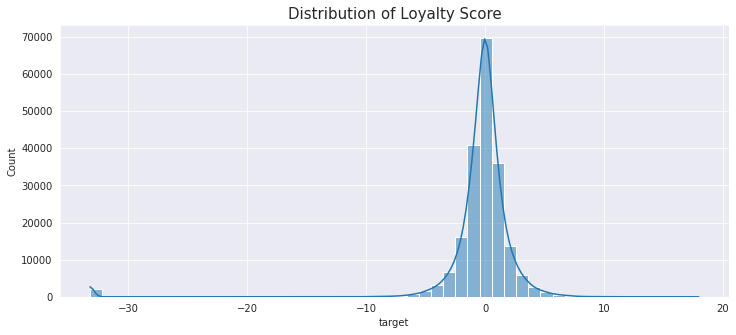

In [ ]:
# Distribution plot of target feature (Loyalty Score)
plt.figure(figsize=(12,5))
sns.histplot(data=card_details_train, x='target', kde=True, bins=50)
plt.title('Distribution of Loyalty Score', fontsize=15)
plt.show()

In [ ]:
max_points = card_details_train.loc[(card_details_train['target'] < 10) & (card_details_train['target'] > -10)].shape[0]
print('Number of data points between target value of -10 and 10 = {} ({:.2f}%)'.format(max_points, max_points/len(card_details_train)*100))

Number of data points between target value of -10 and 10 = 199605 (98.85%)


In [ ]:
no_of_outliers = card_details_train.loc[card_details_train['target']<-30].shape[0]
print('Number of data points as outliers (target value < -30) = {} ({:.2f}%)'.format(no_of_outliers, no_of_outliers/len(card_details_train)*100))

Number of data points as outliers (target value < -30) = 2207 (1.09%)


Observations:

*   Most of the '*card_id*' has '*target*' value between -10 and 10 with majority as value of 0.
*   Around **1,99,605 (98.85%)** of the total number of card_id has such target value.
*   A small portion of the dataset also contain a target value of less than -30 and such points can be considered as an outliers.
*   Around **2,207 (1.09%)** of the total number of '*card_id*' has such target value.
*   Final dataset after removing outliers has **1,99,710** datapoints.


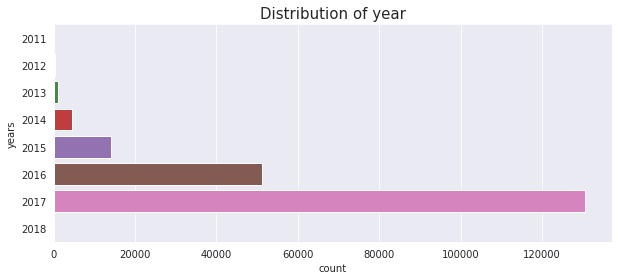

In [ ]:
# Distribution plot of first active year count
plt.figure(figsize=(10,4))
sns.countplot(y=card_details_train['first_active_month'].dt.year)
plt.title('Distribution of year', fontsize=15)
plt.ylabel('years')
plt.show()

Observation(s):

*   Datset contain the records from 1 Nov 2011 to 1 Feb 2018.
*   A large portion of transaction has happened in 2017, followed by 2016 and 2015.
*   Almost no transaction has happened in the year 2011 and 2018.



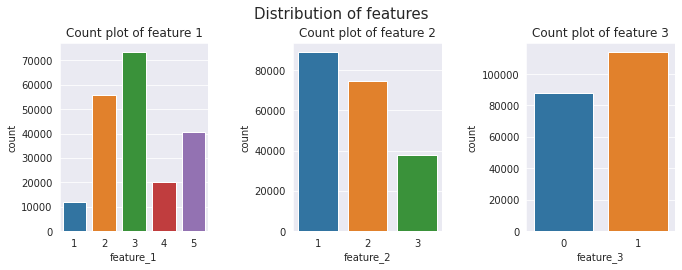

In [ ]:
# plot of features distribution
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle('Distribution of features', fontsize='15')
sns.countplot(x=card_details_train['feature_1'], ax=ax[0])
ax[0].set_title('Count plot of feature 1')
sns.countplot(x=card_details_train['feature_2'], ax=ax[1])
ax[1].set_title('Count plot of feature 2')
sns.countplot(x=card_details_train['feature_3'], ax=ax[2])
ax[2].set_title('Count plot of feature 3')
plt.tight_layout(pad=2.6)
plt.show()

Observation(s):

*   For '*feature_1*', the value lies from 1 to 5, where value 3 has the maximum count.
*   For '*feature_2*', the value lies from 1 to 3, where value 1 has the maximum count.
*   For '*feature_3*', the value lies from 0 and 1, where value 1 has the maximum count.




**(a) How does feature_1 impact target**

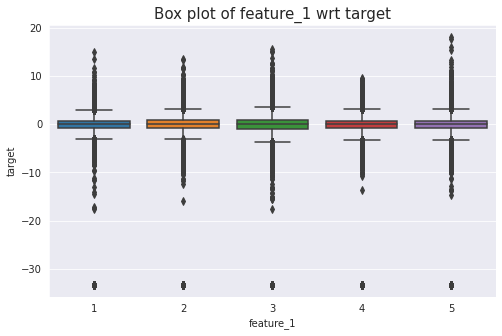

In [ ]:
# box plot of feature_1 wrt target
plt.figure(figsize=(8,5))
sns.boxplot(x='feature_1', y='target', data=card_details_train)
plt.title('Box plot of feature_1 wrt target', fontsize=15)
plt.show()

Observation(s):

*   The distribution of '*feature_1*' wrt '*target*' looks almost similar for all categorical value.



**(b) How does feature_2 impact target**

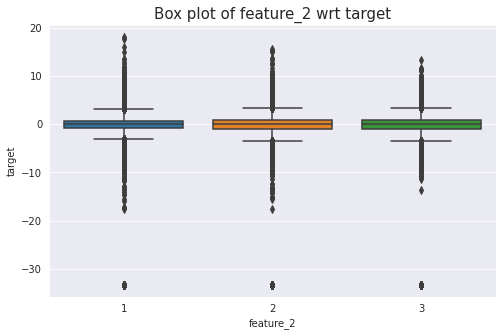

In [ ]:
# box plot of feature_2 wrt target
plt.figure(figsize=(8,5))
sns.boxplot(x='feature_2', y='target', data=card_details_train)
plt.title('Box plot of feature_2 wrt target', fontsize=15)
plt.show()

Observation(s):

*   The distribution of '*feature_2*' wrt '*target*' looks almost similar for all categorical value.



**(c) How does feature_3 impact target**

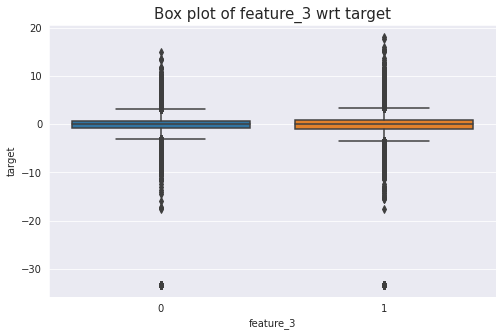

In [ ]:
# box plot of feature_3 wrt target
plt.figure(figsize=(8,5))
sns.boxplot(x='feature_3', y='target', data=card_details_train)
plt.title('Box plot of feature_3 wrt target', fontsize=15)
plt.show()

Observation(s):

*   The distribution of '*feature_3*' wrt '*target*' looks almost similar for all categorical value.



**(d) How does first_active_month impact number of cards**

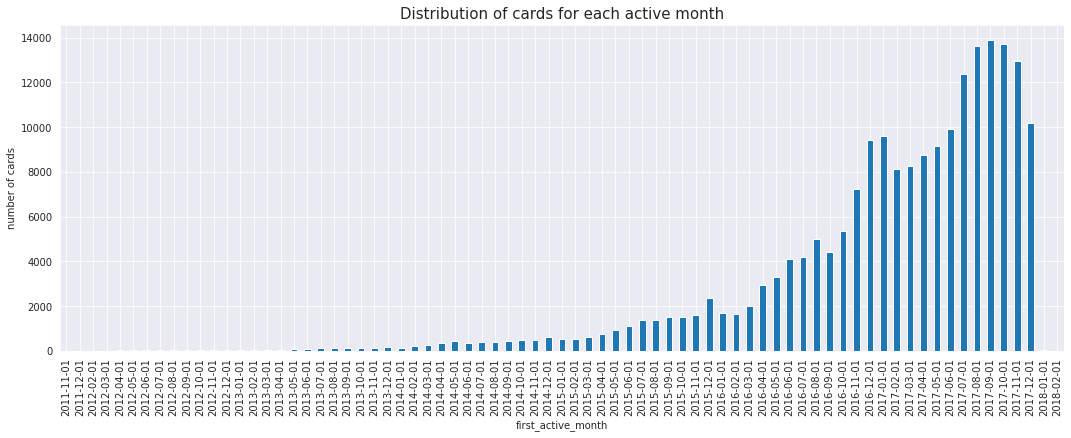

In [ ]:
card_details_train['first_active_month'] = card_details_train['first_active_month'].dt.date

# plot of card distribution for each active month
no_of_issued_cards = card_details_train.groupby(['first_active_month']).count()['card_id']

plt.figure(figsize=(18,6))
no_of_issued_cards.plot.bar()
plt.title('Distribution of cards for each active month', fontsize=15)
plt.ylabel('number of cards')
plt.show()

Observation(s):

*   The number of issued card increases wrt to years.
*   A large number of transaction has happened in last duration of years.
*   A major portion of card was active between 07-2017 to 11-2017.



In [ ]:
f1 = card_details_train['feature_1']
f2 = card_details_train['feature_2']
f3 = card_details_train['feature_3']
ft = card_details_train['target']

**(e) How does feature_1 and feature_2 together impact target**

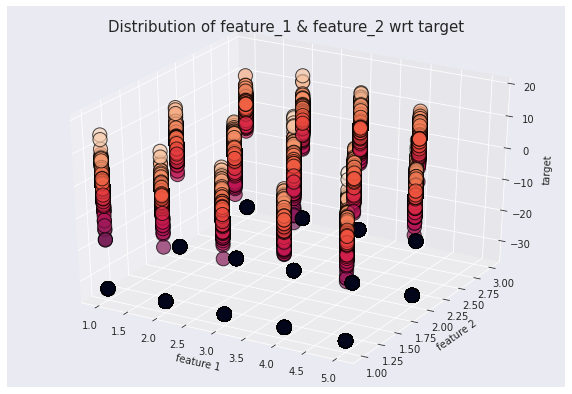

In [ ]:
# plot of feature_1 and feature_2 wrt target
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(f1, f2, ft, linewidths=1, alpha=.7, edgecolor='k', s = 200, c=ft)
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('target')
plt.title('Distribution of feature_1 & feature_2 wrt target', fontsize=15)
plt.show()

Observation(s):

*   Not much clear separation can be depicted between '*feature_1*' and '*feature_2*' together wrt '*target*'.



**(f) How does feature_2 and feature_3 together impact target**

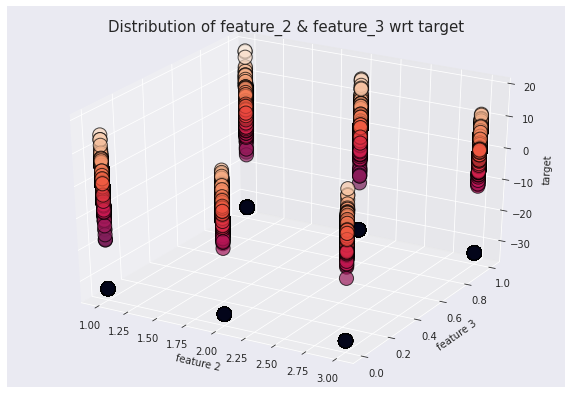

In [ ]:
# plot of feature_2 and feature_3 wrt target
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(f2, f3, ft, linewidths=1, alpha=.7, edgecolor='k', s = 200, c=ft)
ax.set_xlabel('feature 2')
ax.set_ylabel('feature 3')
ax.set_zlabel('target')
plt.title('Distribution of feature_2 & feature_3 wrt target', fontsize=15)
plt.show()

Observation(s):

*   A slight better separation can be depicted between '*feature_2*' and '*feature_3*' together wrt '*target*'.



**(g) How does feature_1 and feature_3 together impact target**

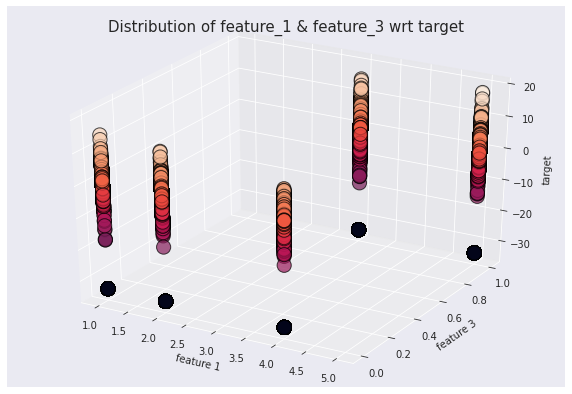

In [ ]:
# plot of feature_1 and feature_3 wrt target
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(f1, f3, ft, linewidths=1, alpha=.7, edgecolor='k', s = 200, c=ft)
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 3')
ax.set_zlabel('target')
plt.title('Distribution of feature_1 & feature_3 wrt target', fontsize=15)
plt.show()

Observation(s):

*   A better separation can be depicted between '*feature_1*' and '*feature_3*' together wrt '*target*'.



<a name='section1.2'><a/>
## 1.2. Dataset 2: card_details_test

### 1.2.1 Basic Descriptions

FEATURES                 | DESCRIPTIONS
-------------------------|-------------
card_id                  | Unique card identifier
first_active_month       | 'YYYY-MM', month of first purchase
feature_1                | Anonymized card categorical feature
feature_2                | Anonymized card categorical feature
feature_3                | Anonymized card categorical feature

In [ ]:
# printing the shape of dataset
print('Shape of card_details_test =', card_details_test.shape)

Shape of card_details_test = (123623, 5)


In [ ]:
# printing few rows
card_details_test = card_details_test[['card_id','first_active_month','feature_1','feature_2','feature_3']]
card_details_test.head()

,card_id,first_active_month,feature_1,feature_2,feature_3
0,C_ID_0ab67a22ab,2017-04-01,3,3,1
1,C_ID_130fd0cbdd,2017-01-01,2,3,0
2,C_ID_b709037bc5,2017-08-01,5,1,1
3,C_ID_d27d835a9f,2017-12-01,2,1,0
4,C_ID_2b5e3df5c2,2015-12-01,5,1,1


In [ ]:
# printing the basic info of dataset
card_details_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   card_id             123623 non-null  object        
 1   first_active_month  123622 non-null  datetime64[ns]
 2   feature_1           123623 non-null  int64         
 3   feature_2           123623 non-null  int64         
 4   feature_3           123623 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.7+ MB


In [ ]:
# printing the statistical summary of real valued features
card_details_test.describe()

,feature_1,feature_2,feature_3
count,123623.00000,123623.000000,123623.000000
mean,3.10926,1.741796,0.564377
std,1.18911,0.749195,0.495840
min,1.00000,1.000000,0.000000
25%,2.00000,1.000000,0.000000
50%,3.00000,2.000000,1.000000
75%,4.00000,2.000000,1.000000
max,5.00000,3.000000,1.000000


Observation(s):

*   In '*card_details_test*' dataset, there are total of **1,23,623** datapoints and **5** feature variables. 
*   '*feature_1*', '*feature_2*', '*feature_3*' are categorical features and there is no '*target*' feature, since it is a test set.



### 1.2.2. Feature Viz

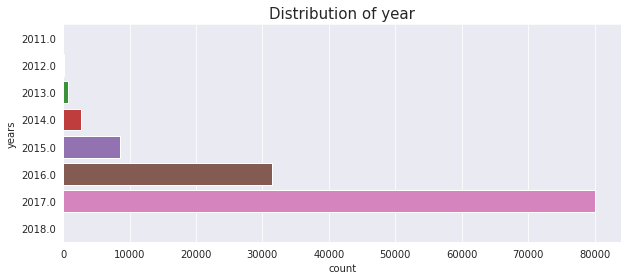

In [ ]:
# Distribution plot of first active year count
plt.figure(figsize=(10,4))
sns.countplot(y=card_details_test['first_active_month'].dt.year)
plt.title('Distribution of year', fontsize=15)
plt.ylabel('years')
plt.show()

Observation(s):

*   Datset contain the records from 1 Nov 2011 to 1 Feb 2018.
*   A large portion of transaction has happened in 2017, followed by 2016 and 2015.
*   Almost no transaction has happened in the year 2011 and 2018.



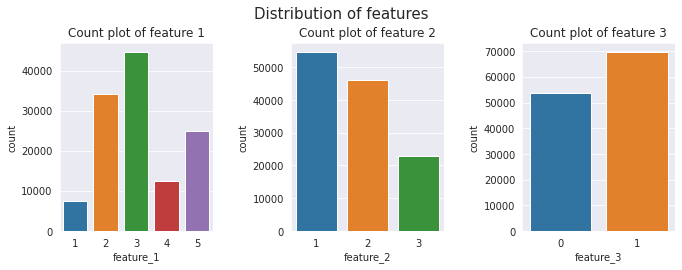

In [ ]:
# plot of features distribution
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle('Distribution of features', fontsize='15')
sns.countplot(x=card_details_test['feature_1'], ax=ax[0])
ax[0].set_title('Count plot of feature 1')
sns.countplot(x=card_details_test['feature_2'], ax=ax[1])
ax[1].set_title('Count plot of feature 2')
sns.countplot(x=card_details_test['feature_3'], ax=ax[2])
ax[2].set_title('Count plot of feature 3')
plt.tight_layout(pad=2.6)
plt.show()

Observation(s):

*   For '*feature_1*', the value lies from 1 to 5, where value 3 has the maximum count.
*   For '*feature_2*', the value lies from 1 to 3, where value 1 has the maximum count.
*   For '*feature_3*', the value lies from 0 and 1, where value 1 has the maximum count.




<a name='section1.3'><a/>
## 1.3. Dataset 3: merchant_details

### 1.3.1. Basic Descriptions

FEATURES                    | DESCRIPTIONS
----------------------------|----------------------
merchant_id                 | Unique merchant identifier
merchant_group_id           | Merchant group (anonymized )
merchant_category_id        | Unique identifier for merchant category (anonymized )
subsector_id                | Merchant category group (anonymized )
numerical_1                 | anonymized measure
numerical_2                 | anonymized measure
category_1                  | anonymized category
category_2                  | anonymized category
category_4                  | anonymized category
city_id                     | City identifier (anonymized )
state_id                    | State identifier (anonymized )
most_recent_sales_range     | Range of revenue (monetary units) in last active month --> A > B > C > D > E
most_recent_purchases_range | Range of quantity of transactions in last active month --> A > B > C > D > E
avg_sales_lag3              | Monthly average of revenue in last 3 months divided by revenue in last active month
avg_purchases_lag3          | Monthly average of transactions in last 3 months divided by transactions in last active month
active_months_lag3          | Quantity of active months within last 3 months
avg_sales_lag6              | Monthly average of revenue in last 6 months divided by revenue in last active month
avg_purchases_lag6          | Monthly average of transactions in last 6 months divided by transactions in last active month
active_months_lag6          | Quantity of active months within last 6 months
avg_sales_lag12             | Monthly average of revenue in last 12 months divided by revenue in last active month
avg_purchases_lag12         | Monthly average of transactions in last 12 months divided by transactions in last active month
active_months_lag12         | Quantity of active months within last 12 months

In [ ]:
# printing the shape of dataset
print('Shape of merchant_details =', merchant_details.shape)

Shape of merchant_details = (334696, 22)


In [ ]:
# printing few rows
merchant_details.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,9.666667,3,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,1.750000,3,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,260.000000,2,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [ ]:
# printing the basic info of dataset
merchant_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int32  
 2   merchant_category_id         334696 non-null  int16  
 3   subsector_id                 334696 non-null  int8   
 4   numerical_1                  334696 non-null  float16
 5   numerical_2                  334696 non-null  float16
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float32
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int8   
 12  avg_sales_lag6               334683 non-null  float32
 13 

In [ ]:
# statistical summary of features
merchant_details.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.0
mean,31028.736143,423.131663,25.116404,0.011482,0.008095,13.839176,inf,2.994108,2.165529e+01,inf,5.947397,2.523122e+01,inf,11.599335,102.917926,11.860942,NaN
std,31623.043426,252.898046,9.807371,0.000000,0.000000,2395.453369,NaN,0.095247,3.947046e+03,NaN,0.394936,5.251777e+03,NaN,1.520138,107.090673,6.176889,0.0
min,1.000000,-1.000000,-1.000000,-0.057465,-0.057465,-82.129997,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.0
25%,3612.000000,222.000000,19.000000,-0.057465,-0.057465,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.0
50%,19900.000000,373.000000,27.000000,-0.057465,-0.057465,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.0
75%,51707.250000,683.000000,33.000000,-0.047546,-0.047546,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.0
max,112586.000000,891.000000,41.000000,183.750000,182.125000,851844.625000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.0


Observations:

*   In '*merchant_details*' dataset, there are total of **3,34,696** datapoints and **22** feature variables. 



### 1.3.2. Features Viz

In [ ]:
# finding total unique values in each features 
print('Total number of Merchants =', merchant_details['merchant_id'].nunique())
print('Total number of Merchant Groups =', merchant_details['merchant_group_id'].nunique())
print('Total number of Merchant Category =', merchant_details['merchant_category_id'].nunique())
print('Total number of Subsector =', merchant_details['subsector_id'].nunique())
print('Total number of Unique City =', merchant_details['city_id'].nunique())
print('Total number of Unique States =', merchant_details['state_id'].nunique())

Total number of Merchants = 334633
Total number of Merchant Groups = 109391
Total number of Merchant Category = 324
Total number of Subsector = 41
Total number of Unique City = 271
Total number of Unique States = 25


**(a) Top 10 merchant group**

In [ ]:
merchant_group = merchant_details.groupby('merchant_group_id')['merchant_id'].count()
merchant_group.nlargest(10).reset_index(name='merchant_count')

,merchant_group_id,merchant_count
0,35,46026
1,434,482
2,419,365
3,713,333
4,3648,305
5,48,283
6,1145,276
7,771,257
8,325,248
9,321,235


Observation(s):

*   The group_id 35 is the largest group with merchant count of 46,026.



**(b) Top 10 merchant category**

In [ ]:
merchant_group = merchant_details.groupby('merchant_category_id')['merchant_id'].count()
merchant_group.nlargest(10).reset_index(name='merchant_count')

,merchant_category_id,merchant_count
0,705,30666
1,278,17992
2,307,17528
3,367,15387
4,68,14341
5,80,13520
6,222,11582
7,884,10398
8,683,9175
9,560,7988


Observation(s):

*   The category_id 705 is the largest category with merchant count of 30,666.



**(c) Top 10 merchant subsector**

In [ ]:
merchant_subsector = merchant_details.groupby('subsector_id')['merchant_id'].count()
merchant_subsector.nlargest(10).reset_index(name='merchant_count')

,subsector_id,merchant_count
0,27,51678
1,37,35575
2,33,30887
3,34,26533
4,21,24207
5,29,21588
6,19,20361
7,16,16435
8,18,14279
9,20,9528


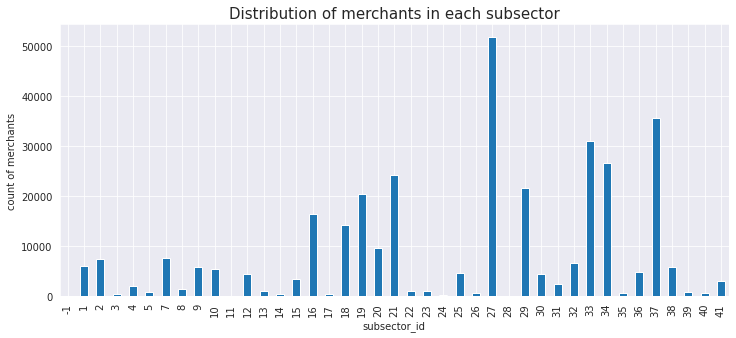

In [ ]:
plt.figure(figsize=(12,5))
merchant_subsector.plot.bar()
plt.title('Distribution of merchants in each subsector', fontsize=15)
plt.ylabel('count of merchants')
plt.show()

Observation(s):

*   The subsector_id 27 is the largest subsector with merchant count of 51,678.

**(d) Top 10 merchant city**

In [ ]:
merchant_city = merchant_details.groupby('city_id')['merchant_id'].count()
merchant_city.nlargest(10).reset_index(name='merchant_count')

,city_id,merchant_count
0,-1,105184
1,69,21658
2,158,7957
3,17,6518
4,143,5368
5,88,5230
6,137,4785
7,212,4324
8,87,3717
9,25,2983


Observation(s):

*   The city_id  -1 is the largest city with merchant count of 1,05,184.

**(e) Top 10 merchant state**

In [ ]:
merchant_state = merchant_details.groupby('state_id')['merchant_id'].count()
merchant_state.nlargest(10).reset_index(name='merchant_count')

,state_id,merchant_count
0,9,92708
1,16,33226
2,15,27224
3,5,23547
4,19,18793
5,20,15660
6,4,14216
7,21,13716
8,-1,11887
9,13,9487


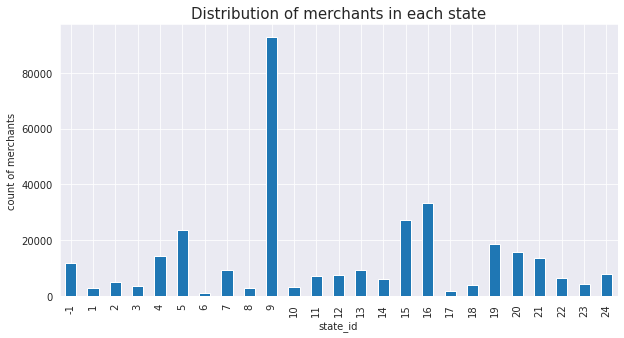

In [ ]:
plt.figure(figsize=(10,5))
merchant_state.plot.bar()
plt.title('Distribution of merchants in each state', fontsize=15)
plt.ylabel('count of merchants')
plt.show()

Observation(s):

*   The state_id 9 is the largest state with merchant count of 92,708.

**(f) Most recent sales range**

E    177104
D    117475
C     34075
B      5037
A      1005
Name: most_recent_sales_range, dtype: int64


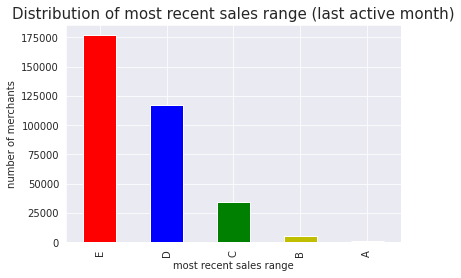

In [ ]:
print(merchant_details['most_recent_sales_range'].value_counts())

merchant_details['most_recent_sales_range'].value_counts().plot(kind='bar', color=['r', 'b', 'g', 'y', 'm'])
plt.title('Distribution of most recent sales range (last active month)', fontsize=15)
plt.xlabel('most recent sales range')
plt.ylabel('number of merchants')
plt.show()

Observation(s):

*   The '*recent_sales_range*' (last active month) of E category is the largest range with merchant count of 177104.

**(g) Most recent purchase range**

E    175309
D    119187
C     34144
B      5046
A      1010
Name: most_recent_purchases_range, dtype: int64


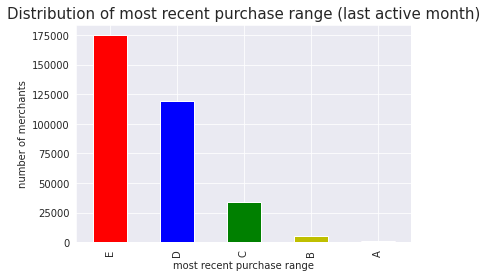

In [ ]:
print(merchant_details['most_recent_purchases_range'].value_counts())

merchant_details['most_recent_purchases_range'].value_counts().plot(kind='bar', color=['r', 'b', 'g', 'y', 'm'])
plt.title('Distribution of most recent purchase range (last active month)', fontsize=15)
plt.xlabel('most recent purchase range')
plt.ylabel('number of merchants')
plt.show()

Observation(s):

*   The '*recent_purchase_range*' (last active month) of E category is the largest range with merchant count of 175309.

**(h) Top 10 merchants with highest average sales lag in last 3 months**

In [ ]:
merchant_details.sort_values(by='avg_sales_lag3', ascending=False, ignore_index=True)[:10][['merchant_id','avg_sales_lag3']]

,merchant_id,avg_sales_lag3
0,M_ID_7ce96c351a,851844.6250
1,M_ID_3c87a47f6b,624741.0000
2,M_ID_39643c7d93,608433.0000
3,M_ID_e16b20b50a,385833.0000
4,M_ID_69618a786a,360107.0000
5,M_ID_0f0334c393,205863.0000
6,M_ID_b694de6ca2,201934.5625
7,M_ID_07930b58ae,148515.0000
8,M_ID_c44ccc8110,133863.0000
9,M_ID_7551d55443,109733.0000


Observation(s):

*   The merchant with highest average sales lag in last 3 months is 'M_ID_7ce96c351a' with sales value of '8,51,844.6250'.


**(i) Top 10 merchants with highest average purchase lag in last 3 months**

In [ ]:
merchant_details.sort_values(by='avg_purchases_lag3', ascending=False, ignore_index=True)[:10][['merchant_id','avg_purchases_lag3']]

,merchant_id,avg_purchases_lag3
0,M_ID_492cfa500c,inf
1,M_ID_73487fed26,inf
2,M_ID_7149162139,inf
3,M_ID_7ce96c351a,6.185133e+04
4,M_ID_71eee7dd69,1.730000e+03
5,M_ID_3c747d94aa,1.690000e+03
6,M_ID_57b61261b3,1.432500e+03
7,M_ID_c9855bf3e3,1.084000e+03
8,M_ID_cd558a87be,8.834444e+02
9,M_ID_63e8cb6879,8.576667e+02


Observation(s):

*   The merchant with highest average purchase lag in last 3 months is 'M_ID_7ce96c351a' with sales value of '61,851.333333'.


**(j) Top 10 merchants with highest average sales lag in last 6 months**

In [ ]:
merchant_details.sort_values(by='avg_sales_lag6', ascending=False, ignore_index=True)[:10][['merchant_id','avg_sales_lag6']]

,merchant_id,avg_sales_lag6
0,M_ID_0f0334c393,1.513959e+06
1,M_ID_3c87a47f6b,9.537920e+05
2,M_ID_39643c7d93,7.766830e+05
3,M_ID_7ce96c351a,7.704433e+05
4,M_ID_69618a786a,6.467640e+05
5,M_ID_e16b20b50a,4.641840e+05
6,M_ID_07930b58ae,2.458400e+05
7,M_ID_b694de6ca2,2.226197e+05
8,M_ID_c44ccc8110,1.338590e+05
9,M_ID_43265162a8,1.291030e+05


Observation(s):

*   The merchant with highest average sales lag in last 6 months is 'M_ID_0f0334c393' with sales value of '1.513959e+06'.


**(k) Top 10 merchants with highest average purchase lag in last 6 months**

In [ ]:
merchant_details.sort_values(by='avg_purchases_lag6', ascending=False, ignore_index=True)[:10][['merchant_id','avg_purchases_lag6']]

,merchant_id,avg_purchases_lag6
0,M_ID_7149162139,inf
1,M_ID_492cfa500c,inf
2,M_ID_73487fed26,inf
3,M_ID_7ce96c351a,5.607750e+04
4,M_ID_c9855bf3e3,3.432667e+03
5,M_ID_71eee7dd69,2.786167e+03
6,M_ID_3435c646fc,2.579000e+03
7,M_ID_3c747d94aa,2.113167e+03
8,M_ID_57b61261b3,1.634558e+03
9,M_ID_cf6cb8fa7a,1.546333e+03


Observation(s):

*   The merchant with highest average purchase lag in last 6 months is 'M_ID_7ce96c351a' with sales value of '56,077.500000'.


**(l) Top 10 merchants with highest average sales lag in last 12 months**

In [ ]:
merchant_details.sort_values(by='avg_sales_lag12', ascending=False, ignore_index=True)[:10][['merchant_id','avg_sales_lag12']]

,merchant_id,avg_sales_lag12
0,M_ID_0f0334c393,2567408.000
1,M_ID_3c87a47f6b,827191.000
2,M_ID_39643c7d93,749804.000
3,M_ID_7ce96c351a,689561.875
4,M_ID_69618a786a,683700.000
5,M_ID_e16b20b50a,460206.000
6,M_ID_07930b58ae,272061.000
7,M_ID_b694de6ca2,229487.000
8,M_ID_7551d55443,217857.000
9,M_ID_c44ccc8110,133859.000


Observation(s):

*   The merchant with highest average sales lag in last 12 months is 'M_ID_0f0334c393' with sales value of '25,67,408.000'.


**(m) Top 10 merchants with highest average purchase lag in last 12 months**

In [ ]:
merchant_details.sort_values(by='avg_purchases_lag12', ascending=False, ignore_index=True)[:10][['merchant_id','avg_purchases_lag12']]

,merchant_id,avg_purchases_lag12
0,M_ID_73487fed26,inf
1,M_ID_7149162139,inf
2,M_ID_492cfa500c,inf
3,M_ID_7ce96c351a,5.021556e+04
4,M_ID_c9855bf3e3,5.236000e+03
5,M_ID_3435c646fc,3.227833e+03
6,M_ID_71eee7dd69,2.941143e+03
7,M_ID_3c747d94aa,2.326889e+03
8,M_ID_c33566ea50,1.878750e+03
9,M_ID_cf6cb8fa7a,1.839143e+03


Observation(s):

*   The merchant with highest average purchase lag in last 12 months is 'M_ID_7ce96c351a' with sales value of '50,215.555556'.


<a name='section1.4'><a/>
## 1.4. Dataset 4: historical_transactions

### 1.4.1. Basic Descriptions

FEATURES             | DESCRIPTIONS
---------------------|-------------
card_id              | Card identifier
merchant_id          | Merchant identifier (anonymized)
merchant_category_id | Merchant category identifier (anonymized )
subsector_id         | Merchant category group identifier (anonymized )
category_1           | anonymized category
category_2           | anonymized category
category_3           | anonymized category
city_id              | City identifier (anonymized )
state_id             | State identifier (anonymized )
month_lag            | month lag to reference date
authorized_flag      | Y' if approved, 'N' if denied
installments         | number of installments of purchase
purchase_amount      | Normalized purchase amount
purchase_date        | Purchase date

In [ ]:
# printing the shape of dataset
print('Shape of historical_transactions =', old_transactions.shape)

Shape of historical_transactions = (29112361, 14)


In [ ]:
# printing first few rows
old_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
# printing the basic info of dataset
old_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int16  
 3   category_1            object 
 4   installments          int16  
 5   category_3            object 
 6   merchant_category_id  int16  
 7   merchant_id           object 
 8   month_lag             int8   
 9   purchase_amount       float32
 10  purchase_date         object 
 11  category_2            float16
 12  state_id              int8   
 13  subsector_id          int8   
dtypes: float16(1), float32(1), int16(3), int8(3), object(6)
memory usage: 1.7+ GB


In [ ]:
# statistical summary of features
old_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,26459497.0,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,6.134567e-02,NaN,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123521e+03,0.0,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.0,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.0,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.0,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.0,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.0,2.400000e+01,4.100000e+01


Observations:

*   In '*historical_transactions*' dataset, there are total of **2,91,12,361** datapoints and **14** feature variables. 



### 1.4.2. Features Viz

In [ ]:
old_transactions['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

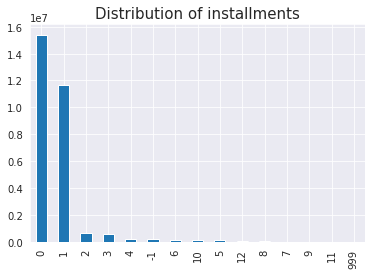

In [ ]:
old_transactions['installments'].value_counts().plot(kind='bar')
plt.title('Distribution of installments', fontsize=15)
plt.show()

In [ ]:
old_transactions['category_1'].value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

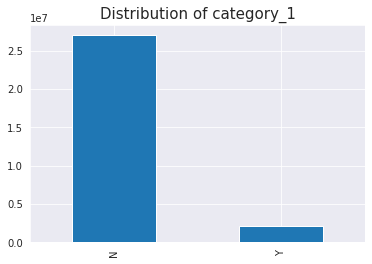

In [ ]:
old_transactions['category_1'].value_counts().plot(kind='bar')
plt.title('Distribution of category_1', fontsize=15)
plt.show()

In [ ]:
old_transactions['category_2'].value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

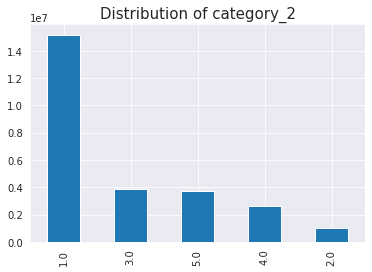

In [ ]:
old_transactions['category_2'].value_counts().plot(kind='bar')
plt.title('Distribution of category_2', fontsize=15)
plt.show()

In [ ]:
old_transactions['category_3'].value_counts()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

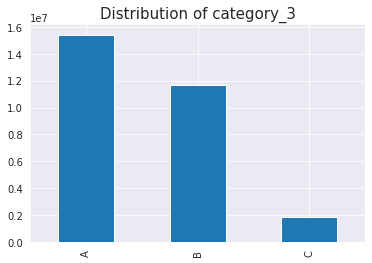

In [ ]:
old_transactions['category_3'].value_counts().plot(kind='bar')
plt.title('Distribution of category_3', fontsize=15)
plt.show()

<a name='section1.5'><a/>
## 1.5. Dataset 5: new_transactions

### 1.5.1. Basic Descriptions

FEATURES             | DESCRIPTIONS
---------------------|-------------
card_id              | Card identifier
merchant_id          | Merchant identifier (anonymized)
merchant_category_id | Merchant category identifier (anonymized )
subsector_id         | Merchant category group identifier (anonymized )
category_1           | anonymized category
category_2           | anonymized category
category_3           | anonymized category
city_id              | City identifier (anonymized )
state_id             | State identifier (anonymized )
month_lag            | month lag to reference date
authorized_flag      | Y' if approved, 'N' if denied
installments         | number of installments of purchase
purchase_amount      | Normalized purchase amount
purchase_date        | Purchase date

In [ ]:
# printing the shape of dataset
print('Shape of new transactions =', new_transactions.shape)

Shape of new transactions = (1963031, 14)


In [ ]:
# printing first few rows
new_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,NaN,-1,29


In [ ]:
# printing the basic info of dataset
new_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int16  
 3   category_1            object 
 4   installments          int16  
 5   category_3            object 
 6   merchant_category_id  int16  
 7   merchant_id           object 
 8   month_lag             int8   
 9   purchase_amount       float16
 10  purchase_date         object 
 11  category_2            float16
 12  state_id              int8   
 13  subsector_id          int8   
dtypes: float16(2), int16(3), int8(3), object(6)
memory usage: 114.2+ MB


In [ ]:
# statistical summary of features
new_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1851286.0,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,NaN,NaN,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,NaN,0.0,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.470703e-01,1.0,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.167969e-01,1.0,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748047e-01,1.0,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.815430e-01,3.0,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.632500e+02,5.0,2.400000e+01,4.100000e+01


Observations:

*   In '*new_transactions*' dataset, there are total of **19,63,031** datapoints and **14** feature variables. 



### 1.5.2. Features Viz

In [ ]:
new_transactions['installments'].value_counts()

 0      922244
 1      836178
-1       55922
 2       54729
 3       44750
 4       14815
 6       10389
 5        9296
 10       8899
 12       2850
 8        1555
 7         863
 9         478
 11         61
 999         2
Name: installments, dtype: int64

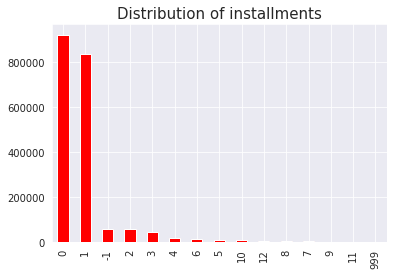

In [ ]:
new_transactions['installments'].value_counts().plot(kind='bar', color='r')
plt.title('Distribution of installments', fontsize=15)
plt.show()

In [ ]:
new_transactions['category_1'].value_counts()

N    1899935
Y      63096
Name: category_1, dtype: int64

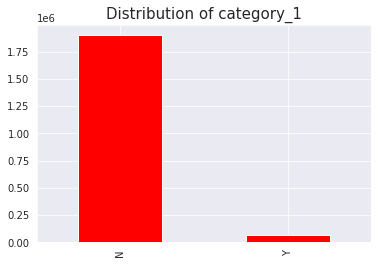

In [ ]:
new_transactions['category_1'].value_counts().plot(kind='bar', color='r')
plt.title('Distribution of category_1', fontsize=15)
plt.show()

In [ ]:
new_transactions['category_2'].value_counts()

1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: category_2, dtype: int64

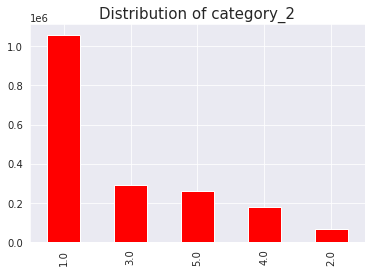

In [ ]:
new_transactions['category_2'].value_counts().plot(kind='bar', color='r')
plt.title('Distribution of category_2', fontsize=15)
plt.show()

In [ ]:
new_transactions['category_3'].value_counts()

A    922244
B    836178
C    148687
Name: category_3, dtype: int64

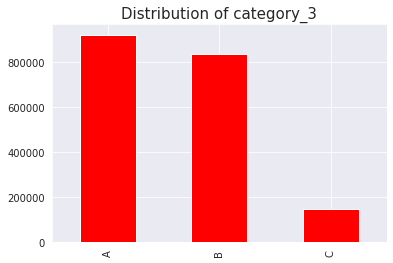

In [ ]:
new_transactions['category_3'].value_counts().plot(kind='bar', color='r')
plt.title('Distribution of category_3', fontsize=15)
plt.show()



---



# References:

*   https://www.kaggle.com/c/elo-merchant-category-recommendation
*   https://stackoverflow.com/
*   https://seaborn.pydata.org/

